# Day 2
batch size 256 lr 1e-3, weighted

### Import modules

In [2]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [3]:
classTrainFeatures = basic_features
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [4]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.105s 


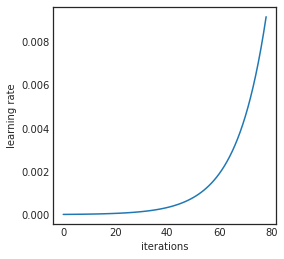

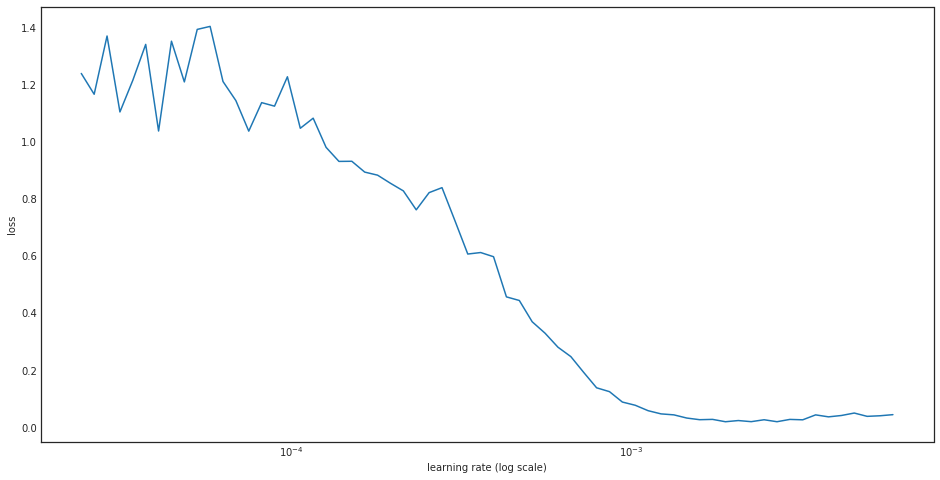

______________________________________



In [5]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=True, verbose=0)

In [6]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.0224863965639
2 New best found: 0.0179314360422
3 New best found: 0.0176988300299
4 New best found: 0.0170002694676
5 New best found: 0.0167144588916
6 New best found: 0.0165935251367
7 New best found: 0.0165781418649
8 New best found: 0.0163654108564
9 New best found: 0.0161831617113
10 New best found: 0.0160696771942
11 New best found: 0.0159486996469
12 New best found: 0.015885364874
13 New best found: 0.0158741805679
14 New best found: 0.0158144522649
15 New best found: 0.0158104772137
17 New best found: 0.0156520069599
18 New best found: 0.015604684526
20 New best found: 0.0155388842078
23 New best found: 0.015512171408
24 New best found: 0.0154280940226
26 New best found: 0.0153812382108
27 New best found: 0.0153608034782
29 New best found: 0.0153538191776
40 New best found: 0.0153200944867
41 New best found: 0.0152659927333
46 New best found: 0.015226774

101 New best found: 0.0153305756654
107 New best found: 0.0153018301093
169 New best found: 0.0152721553816
Early stopping after 369 epochs
Score is: {'loss': 0.015272155381626655, 'AUC': 0.1052256370037098, 'wAUC': 0.0668983458440674}
Fold took 290.669s

Running fold 6 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111490). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0247014262581
2 New best found: 0.0188412332957
3 New best found: 0.018442225919
4 New best found: 0.0172695881324
5 New best found: 0.016929668936
6 New best found: 0.0167710758671
7 New best found: 0.0167505635512
8 New best found: 0.0164515927651
9 New best found: 0.016197278133
10 New best found: 0.0160384458828
11 New best found: 0.0159228115363
12 New best found: 0.0158864961591
13 New best found: 0.0158234137935
14 New best found: 0.015816254707
15 New best found: 0.0158046005343
16 New best found: 0.0156914254822
18 New best found: 0.0154727394346
20 New best found: 0.0153503138845
21 New best found: 0.0153397473785
22 New best found: 0.0152646629476
23 New best found: 0.0152592132891
24 New best found: 0.0152393323832
25 New best found: 0.0151782954223
27 New best found: 0.0151694210014
28 New best found: 0.0151659221653
29 New best found: 0.0151529016641
30 New best found: 0.0151490894112
31 New best found: 0.015147528175
40 New best found: 0.0151428598494

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.105920). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0238134002306
2 New best found: 0.0183014312508
3 New best found: 0.0180337025181
4 New best found: 0.0174654342614
5 New best found: 0.0172644916052
6 New best found: 0.0171722639265
7 New best found: 0.0171581924566
8 New best found: 0.0170436743056
9 New best found: 0.0168125391965
10 New best found: 0.016721890417
11 New best found: 0.016681572186
12 New best found: 0.0165276941986
13 New best found: 0.0165032800842
14 New best found: 0.016481808227
15 New best found: 0.0164781314054
16 New best found: 0.0164383463177
17 New best found: 0.0162549185116
18 New best found: 0.0162500824893
19 New best found: 0.0161960625774
20 New best found: 0.0161252698844
23 New best found: 0.0159553846402
25 New best found: 0.0159011864307
26 New best found: 0.0158646729182
27 New best found: 0.0158642493556
29 New best found: 0.0158580263266
30 New best found: 0.0158546617697
31 New best found: 0.0158539632354
35 New best found: 0.015793789497
41 New best found: 0.015699977909

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119657). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0235879065165
2 New best found: 0.0187456571862
3 New best found: 0.0184073545274
4 New best found: 0.0172757823772
5 New best found: 0.0168673573285
6 New best found: 0.0167293339567
7 New best found: 0.0167033135005
8 New best found: 0.0164048990787
9 New best found: 0.0162182868642
10 New best found: 0.0160469627637
11 New best found: 0.0159261026711
12 New best found: 0.0158406113121
13 New best found: 0.0158015726113
14 New best found: 0.0157871177105
15 New best found: 0.0157802683562
16 New best found: 0.015681478863
17 New best found: 0.0156051510985
18 New best found: 0.0155632886312
20 New best found: 0.0154914822377
21 New best found: 0.0153836950473
23 New best found: 0.0153738531898
25 New best found: 0.0152942215943
29 New best found: 0.0152782031953
36 New best found: 0.0152681644354
38 New best found: 0.0152591725637
39 New best found: 0.0151747106173
44 New best found: 0.0151699884517
47 New best found: 0.0151499288394
48 New best found: 0.015124332

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132523). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0224106651147
2 New best found: 0.0182585176055
3 New best found: 0.0180583664136
4 New best found: 0.0174399876499
5 New best found: 0.0171600495143
6 New best found: 0.0170762650196
7 New best found: 0.0170534820949
8 New best found: 0.0168029067733
9 New best found: 0.0166583593914
10 New best found: 0.016536018384
11 New best found: 0.0164027804545
12 New best found: 0.0163145018082
13 New best found: 0.0162722802098
14 New best found: 0.0162498146529
15 New best found: 0.0162475703126
16 New best found: 0.0161808966405
17 New best found: 0.016133661486
18 New best found: 0.0160054004929
19 New best found: 0.0159294354721
20 New best found: 0.015849169801
21 New best found: 0.0158242684985
22 New best found: 0.0158049319583
23 New best found: 0.0157772956146
24 New best found: 0.0157154710024
26 New best found: 0.0156687336971
28 New best found: 0.0156658648335
29 New best found: 0.0156484181123
30 New best found: 0.0156483784452
31 New best found: 0.01564762104

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147639). Check your callbacks.
  % delta_t_median)


1 New best found: 0.0243631263673
2 New best found: 0.0182137386985
3 New best found: 0.0179469985229
4 New best found: 0.017227188203
5 New best found: 0.0170162360526
6 New best found: 0.0168975905683
7 New best found: 0.0168805679064
8 New best found: 0.0166660726727
9 New best found: 0.0164854975942
10 New best found: 0.0164404665857
11 New best found: 0.0162748737622
12 New best found: 0.01624719217
13 New best found: 0.0161836091722
15 New best found: 0.0161781653905
16 New best found: 0.0161403083433
17 New best found: 0.0160184026727
18 New best found: 0.0159436043474
19 New best found: 0.0158318252047
22 New best found: 0.0157596207636
24 New best found: 0.0156583127378
26 New best found: 0.0156185738683
28 New best found: 0.0155982694597
29 New best found: 0.0155929715758
30 New best found: 0.0155926733848
31 New best found: 0.0155916933679
35 New best found: 0.0155867351661
36 New best found: 0.0154900576569
41 New best found: 0.0154861964333
42 New best found: 0.01545453906

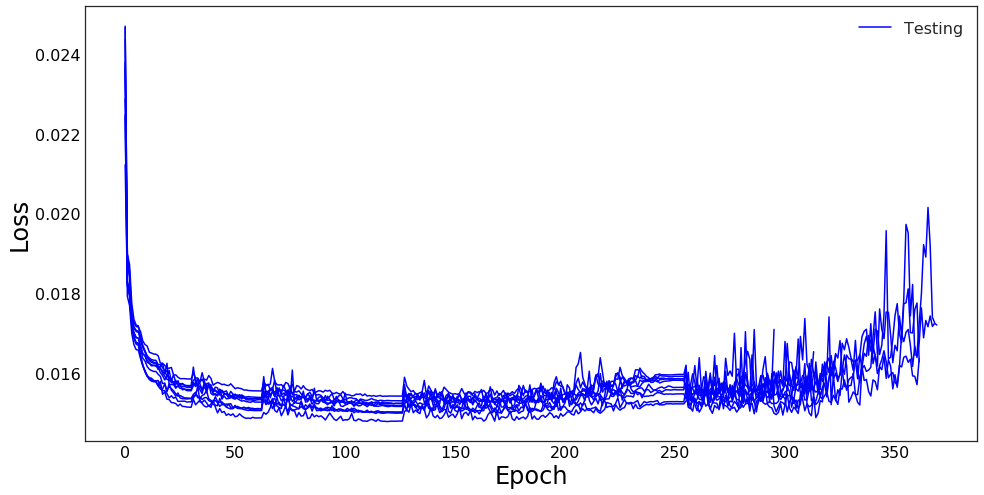

Mean wAUC = 0.0672 +- 0.0008
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=200, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 0.014789282591220402
Model 1 is 0 with loss = 0.014955854490226815
Model 2 is 2 with loss = 0.014979931187169697
Model 3 is 7 with loss = 0.015017185204217279
Model 4 is 9 with loss = 0.015140930447543078
Model 5 is 3 with loss = 0.015180114317463776
Model 6 is 1 with loss = 0.015184319923144913
Model 7 is 8 with loss = 0.015229138184619335
Model 8 is 4 with loss = 0.015272155381626655
Model 9 is 6 with loss = 0.015414068611701925


## Response on development data

In [10]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00036301799288s per sample

Predicting batch 2 out of 10
Prediction took 0.000256721415905s per sample

Predicting batch 3 out of 10
Prediction took 0.000232202590367s per sample

Predicting batch 4 out of 10
Prediction took 0.000216179001331s per sample

Predicting batch 5 out of 10
Prediction took 0.000244603455067s per sample

Predicting batch 6 out of 10
Prediction took 0.000238681697845s per sample

Predicting batch 7 out of 10
Prediction took 0.000306426405907s per sample

Predicting batch 8 out of 10
Prediction took 0.000356177305173s per sample

Predicting batch 9 out of 10
Prediction took 0.000302832045193s per sample

Predicting batch 10 out of 10
Prediction took 0.000349502765189s per sample



In [11]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.897035423378, weighted 0.935845245322


## Response on val data

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000285478210449s per sample

Predicting batch 2 out of 10
Prediction took 0.000220810604095s per sample

Predicting batch 3 out of 10
Prediction took 0.000213769006729s per sample

Predicting batch 4 out of 10
Prediction took 0.000211696624756s per sample

Predicting batch 5 out of 10
Prediction took 0.000221527814865s per sample

Predicting batch 6 out of 10
Prediction took 0.000212532186508s per sample

Predicting batch 7 out of 10
Prediction took 0.000214628982544s per sample

Predicting batch 8 out of 10
Prediction took 0.000213771820068s per sample

Predicting batch 9 out of 10
Prediction took 0.000268461799622s per sample

Predicting batch 10 out of 10
Prediction took 0.000308586835861s per sample



In [13]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.895394187597, weighted 0.932187238411


## Evaluation

### Import in dataframe

In [14]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [15]:
devData = convertToDF(trainData)
valData = convertToDF(valData)

200000 candidates loaded
50000 candidates loaded


In [16]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

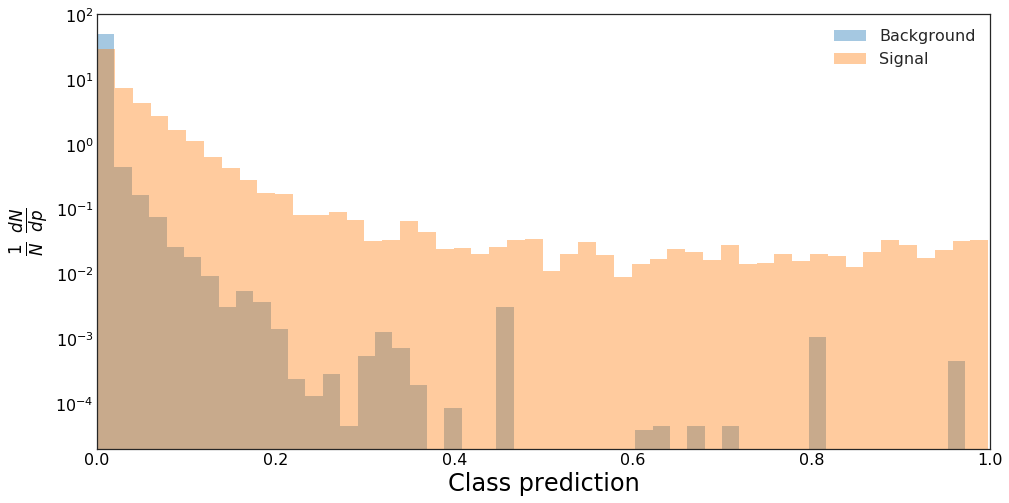

In [17]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [26]:
amsScan(valData)

[0.0225139781832695, 1.6469078350270183]
CPU times: user 1min 27s, sys: 0 ns, total: 1min 27s
Wall time: 1min 27s


In [27]:
scoreTest(ensemble, weights, classTrainFeatures, 0.0225139781832695, 'Model_0_Basic_Features_256_1e-3_swish_mult2_200E_weighted_comp')